# Purpose of this notebook

This notebook is used to visualise the features from the numpy arrays extracted by extract_arrays.ipynb. It is not required in the data processing pipeline.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelBinarizer
from matplotlib import pyplot as plt
import random

In [2]:
FEATURES_PATH = "data/my_20_sec_features-2022_07_04__09_01_04.npy"
LABELS_PATH = "data/my_20_sec_labels-2022_07_04__09_01_04.npy"

SEED = 42

In [3]:
with open(FEATURES_PATH, 'rb') as f:
    features = np.load(f)

with open(LABELS_PATH, 'rb') as f:
    labels = np.load(f)

In [4]:
(unique, counts) = np.unique(labels, return_counts=True)
frequencies = np.asarray((unique, counts)).T

frequencies

array([['www.amazon.co.uk', '101'],
       ['www.bbc.co.uk', '108'],
       ['www.ebay.co.uk', '83'],
       ['www.facebook.com', '100'],
       ['www.google.co.uk', '104'],
       ['www.google.com', '96'],
       ['www.twitter.com', '114'],
       ['www.uwe.ac.uk', '97'],
       ['www.wikipedia.com', '111'],
       ['www.youtube.com', '86']], dtype='<U21')

([<matplotlib.patches.Wedge at 0x13d4e91f0>,
 [Text(-0.3744039686218431, 1.140097218784527, 'www.amazon.co.uk'),
  Text(-0.9924967099693871, 0.6745000227575553, 'www.bbc.co.uk'),
  Text(-1.1999940781299867, -0.0037699407108497647, 'www.ebay.co.uk'),
  Text(-1.005033631966768, -0.6556732407348094, 'www.facebook.com'),
  Text(-0.4135714673094293, -1.12648064405365, 'www.google.co.uk'),
  Text(0.32754237493433486, -1.154433191060607, 'www.google.com'),
  Text(0.9663694970902241, -0.7114281376875586, 'www.twitter.com'),
  Text(1.1995203672364363, 0.03392474885633583, 'www.uwe.ac.uk'),
  Text(0.9317837617020591, 0.7561607113758032, 'www.wikipedia.com'),
  Text(0.3202822895191488, 1.1564684409962824, 'www.youtube.com')],
 [Text(-0.21840231502940846, 0.6650567109576409, '10.1%'),
  Text(-0.578956414148809, 0.3934583466085739, '10.8%'),
  Text(-0.6999965455758256, -0.0021991320813290294, '8.3%'),
  Text(-0.5862696186472813, -0.38247605709530547, '10.0%'),
  Text(-0.24125002259716705, -0.657113

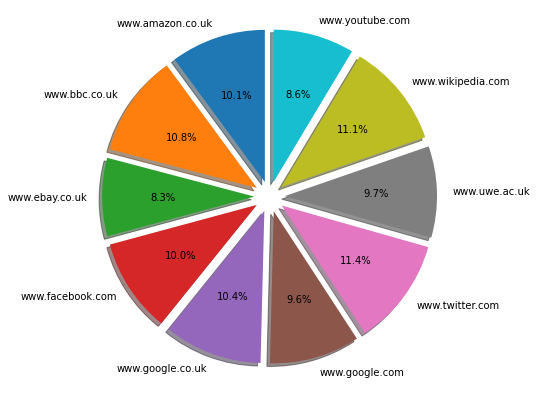

In [5]:
explode = [0.1] * len(frequencies[:,0])
plt.figure(figsize=(7,7))
plt.pie(frequencies[:,1], labels=frequencies[:,0], explode=explode, shadow=True, startangle=90, autopct='%1.1f%%')

In [6]:
max = features.max()
print(f"Max value: {max}")
features_scaled = features/max

Max value: 590.0


(array([116., 256.,  50.,  58.,  40.,  46.,  68.,  47.,  77.,  23.,  22.,
         25.,  16.,   7.,   8.,  68.,  11.,   3.,   1.,   1.,   1.,   3.,
          2.,   1.,   0.,   2.,   0.,   0.,   0.,   3.,   1.,   4.,   2.,
          1.,   0.,   3.,   1.,   2.,   1.,   1.,   1.,   1.,   0.,   0.,
          0.,   1.,   0.,   1.,   8.,  17.]),
 array([  8.  ,  19.64,  31.28,  42.92,  54.56,  66.2 ,  77.84,  89.48,
        101.12, 112.76, 124.4 , 136.04, 147.68, 159.32, 170.96, 182.6 ,
        194.24, 205.88, 217.52, 229.16, 240.8 , 252.44, 264.08, 275.72,
        287.36, 299.  , 310.64, 322.28, 333.92, 345.56, 357.2 , 368.84,
        380.48, 392.12, 403.76, 415.4 , 427.04, 438.68, 450.32, 461.96,
        473.6 , 485.24, 496.88, 508.52, 520.16, 531.8 , 543.44, 555.08,
        566.72, 578.36, 590.  ]),
 <BarContainer object of 50 artists>)

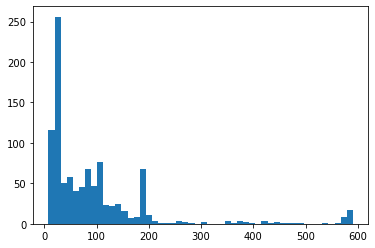

In [7]:
maxes = [arr.max() for arr in features]
plt.hist(maxes, bins=50)

In [8]:
unique_labels = np.unique(labels)

In [9]:
labels_df = pd.DataFrame(labels, columns=["label"])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

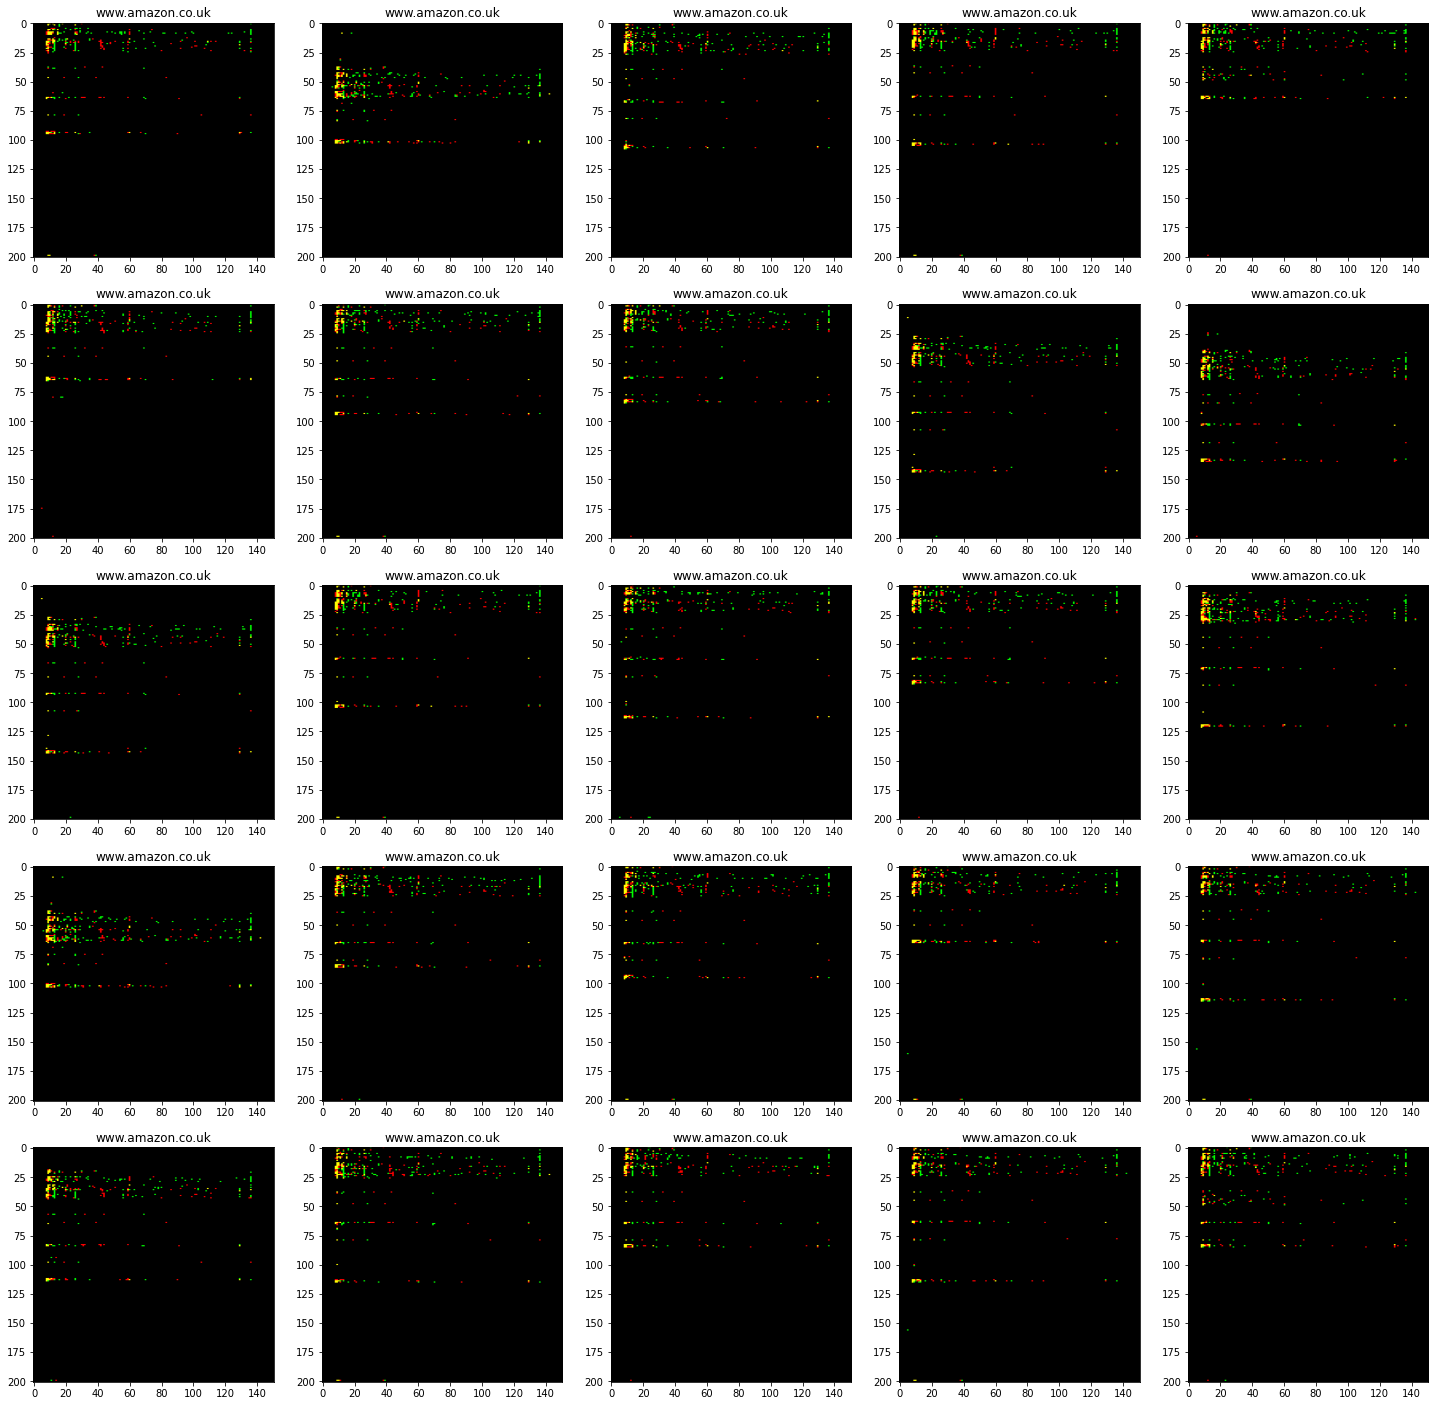

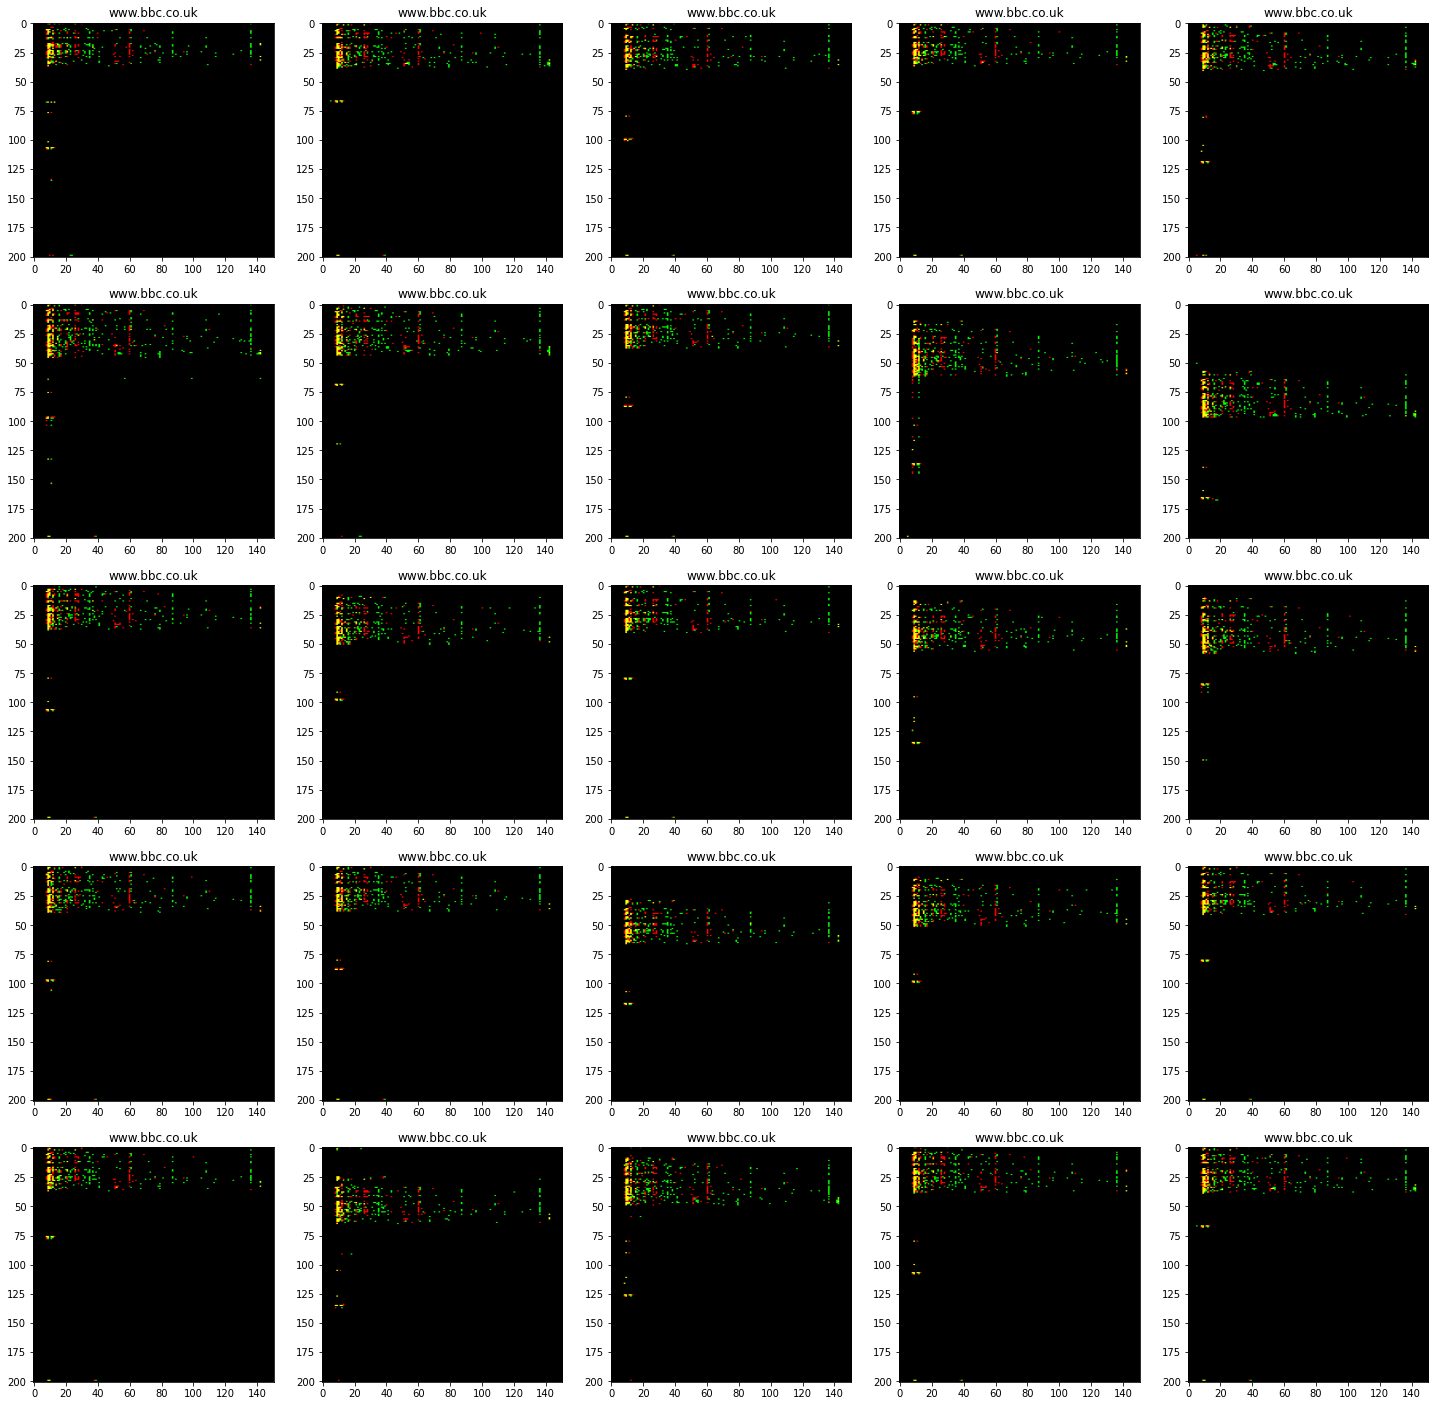

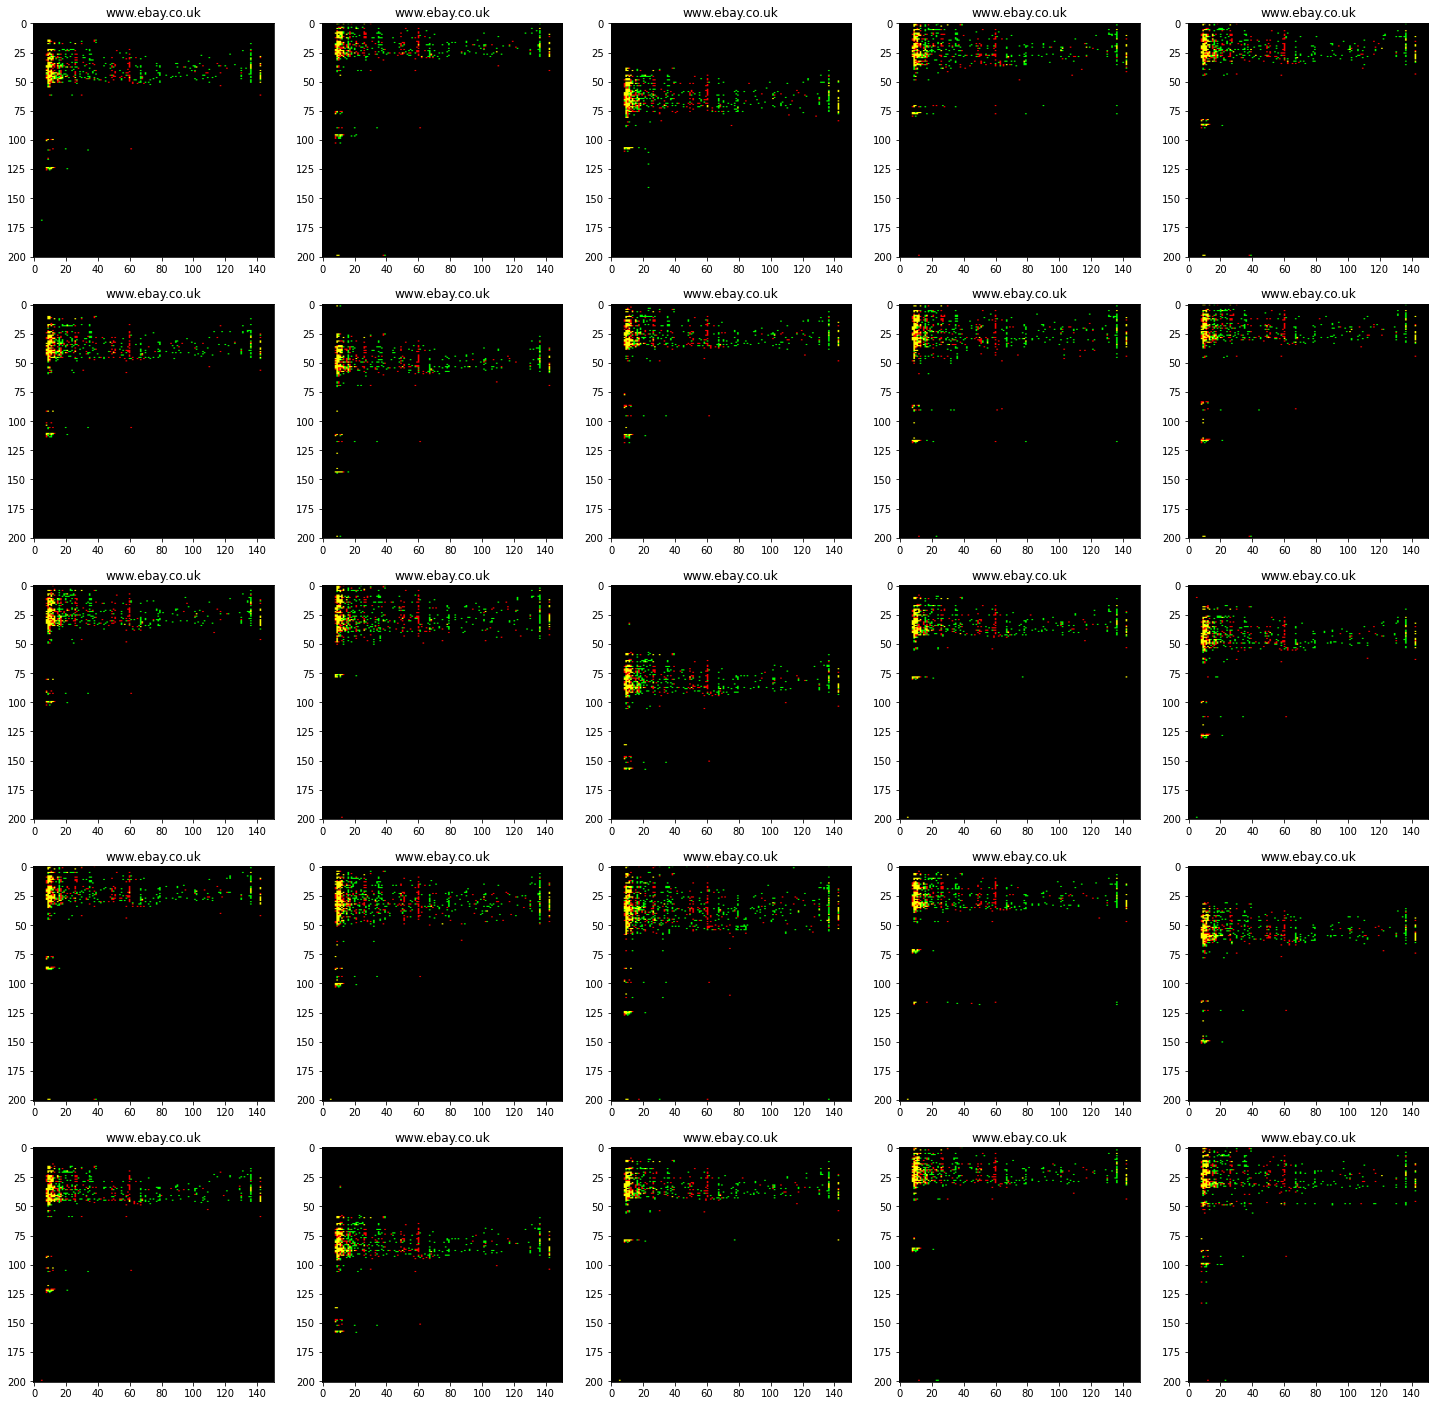

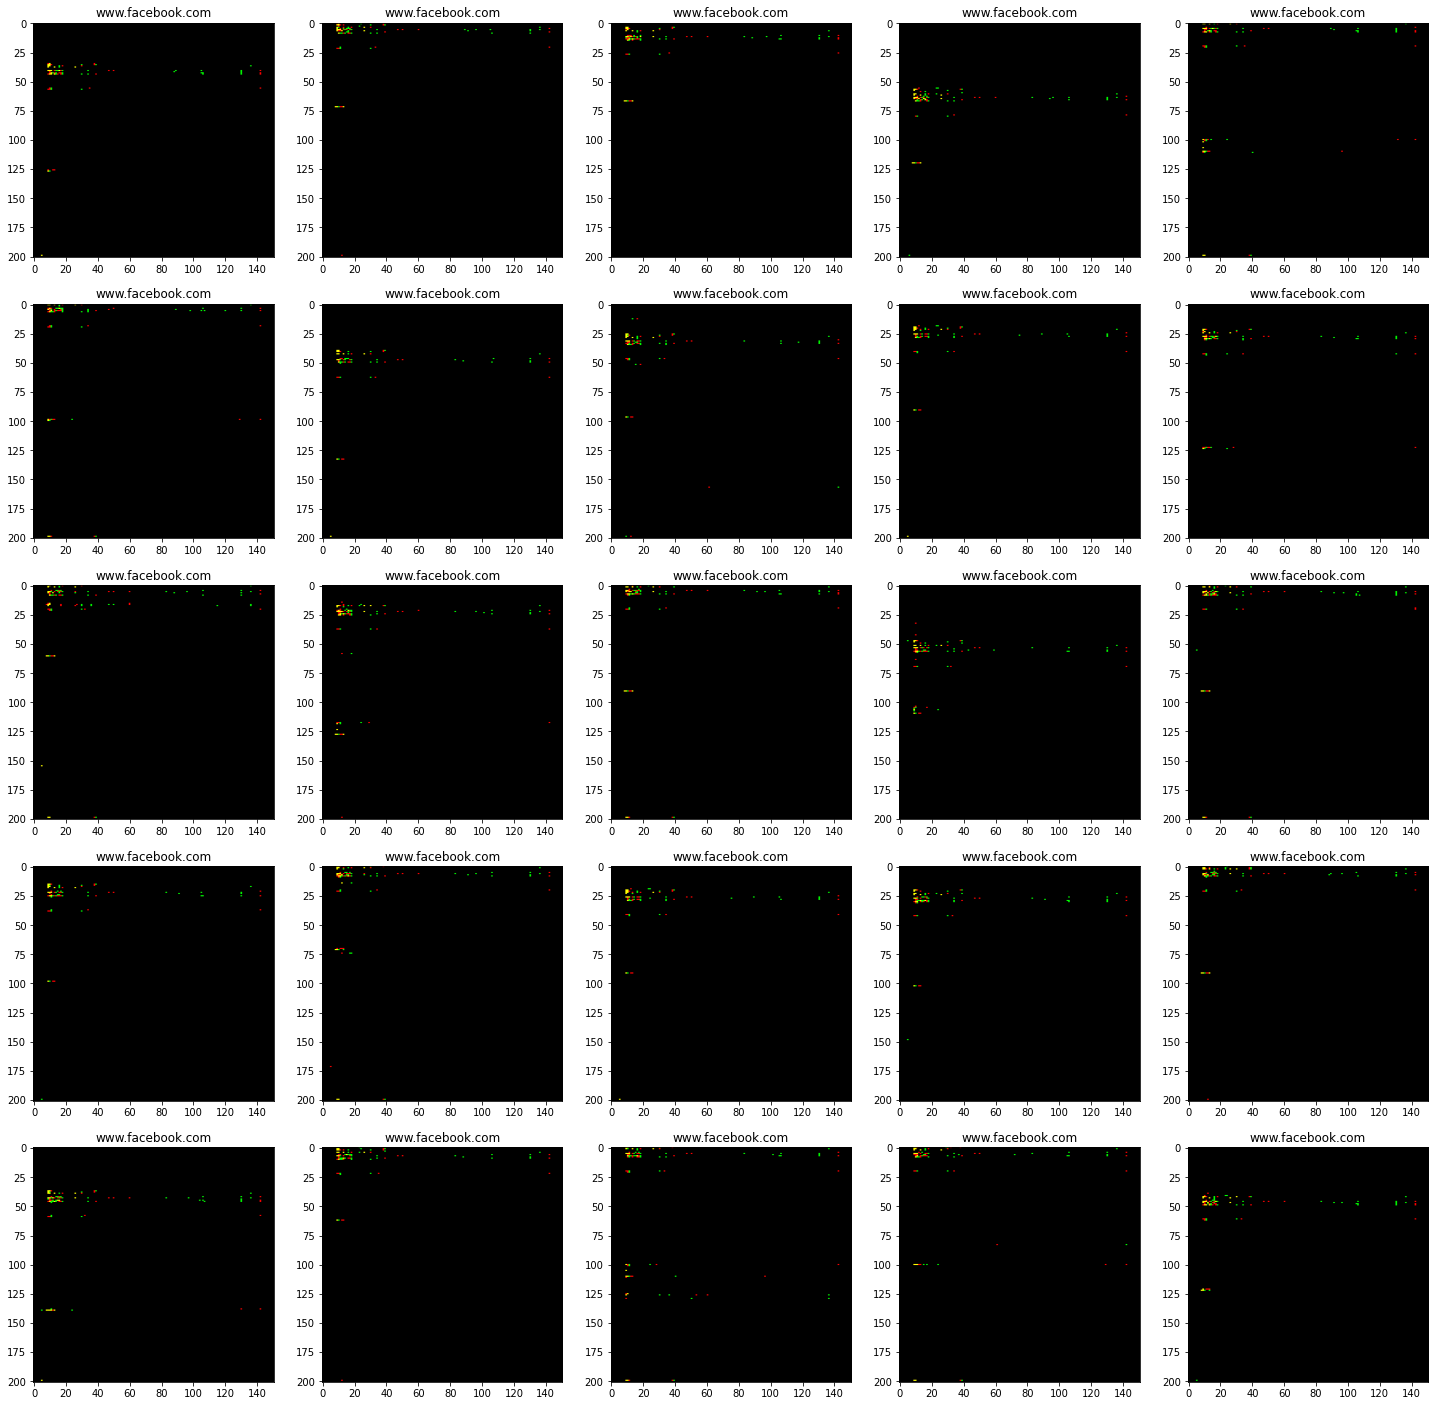

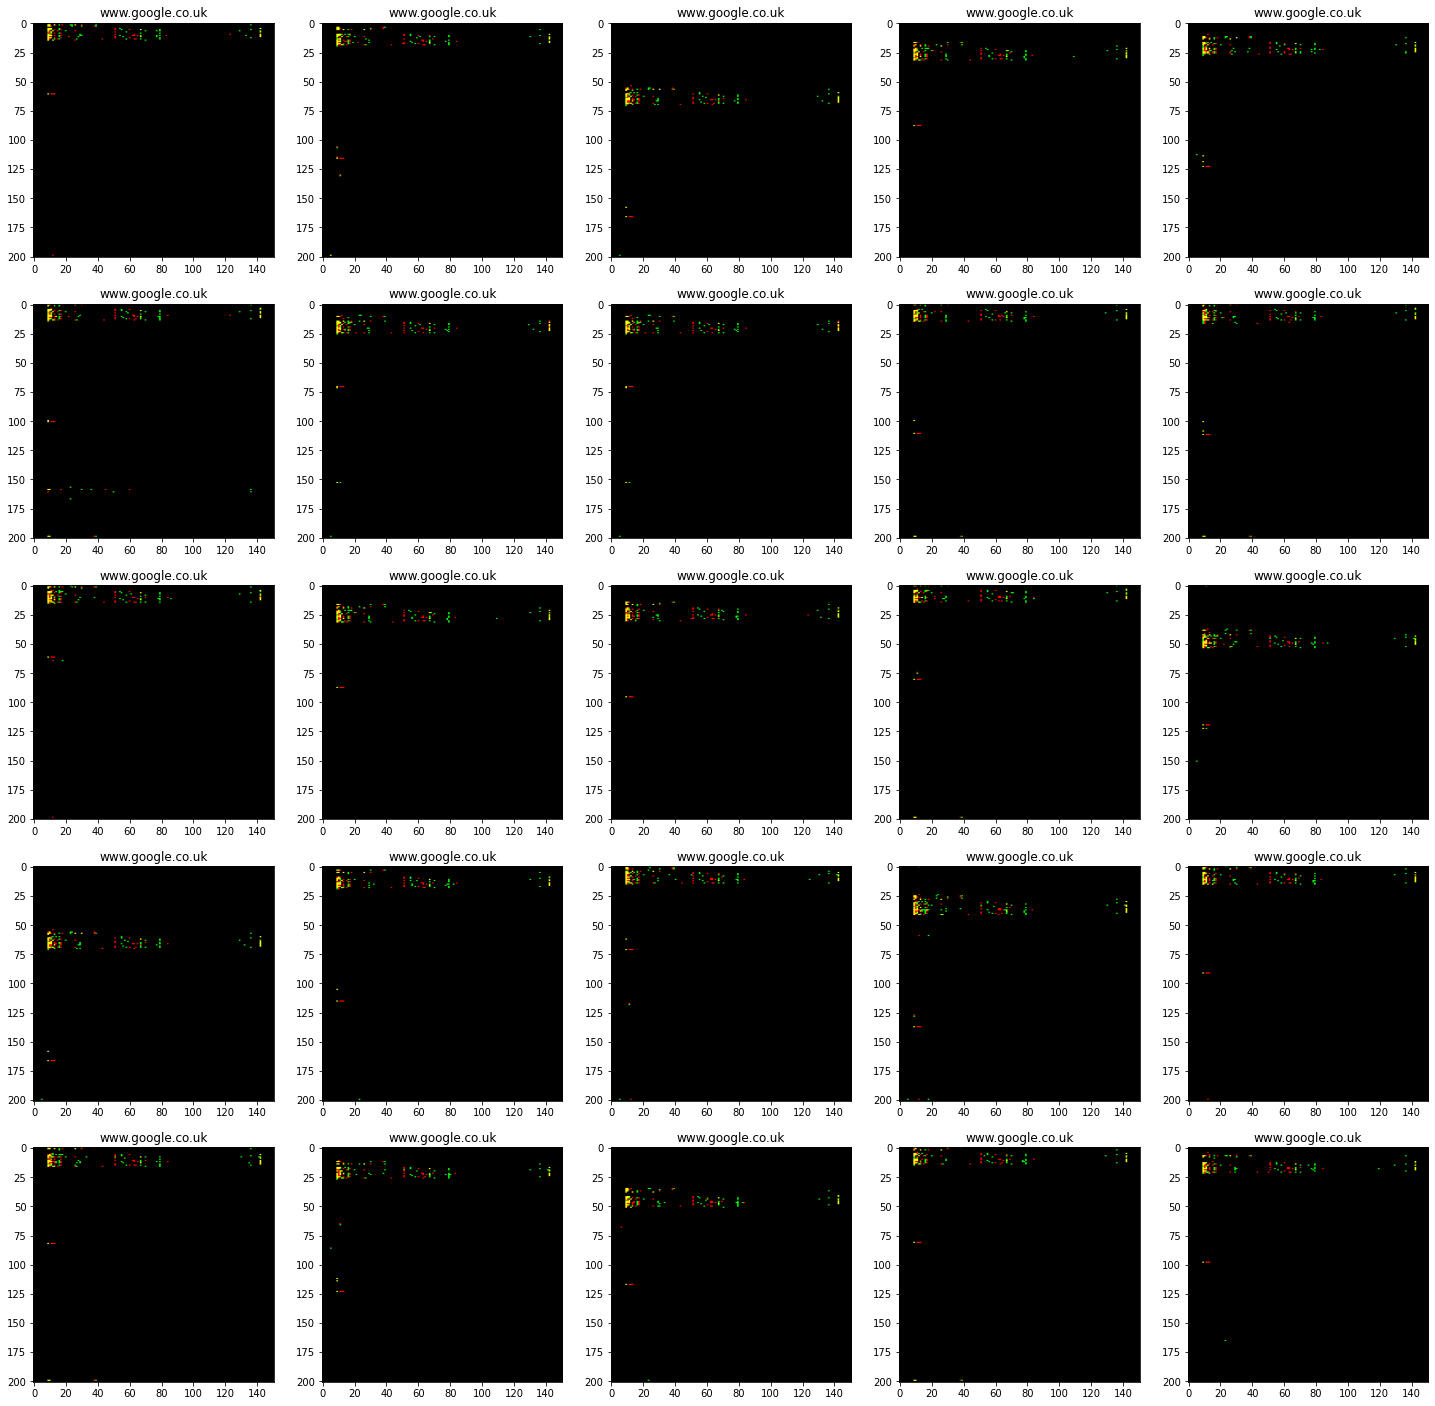

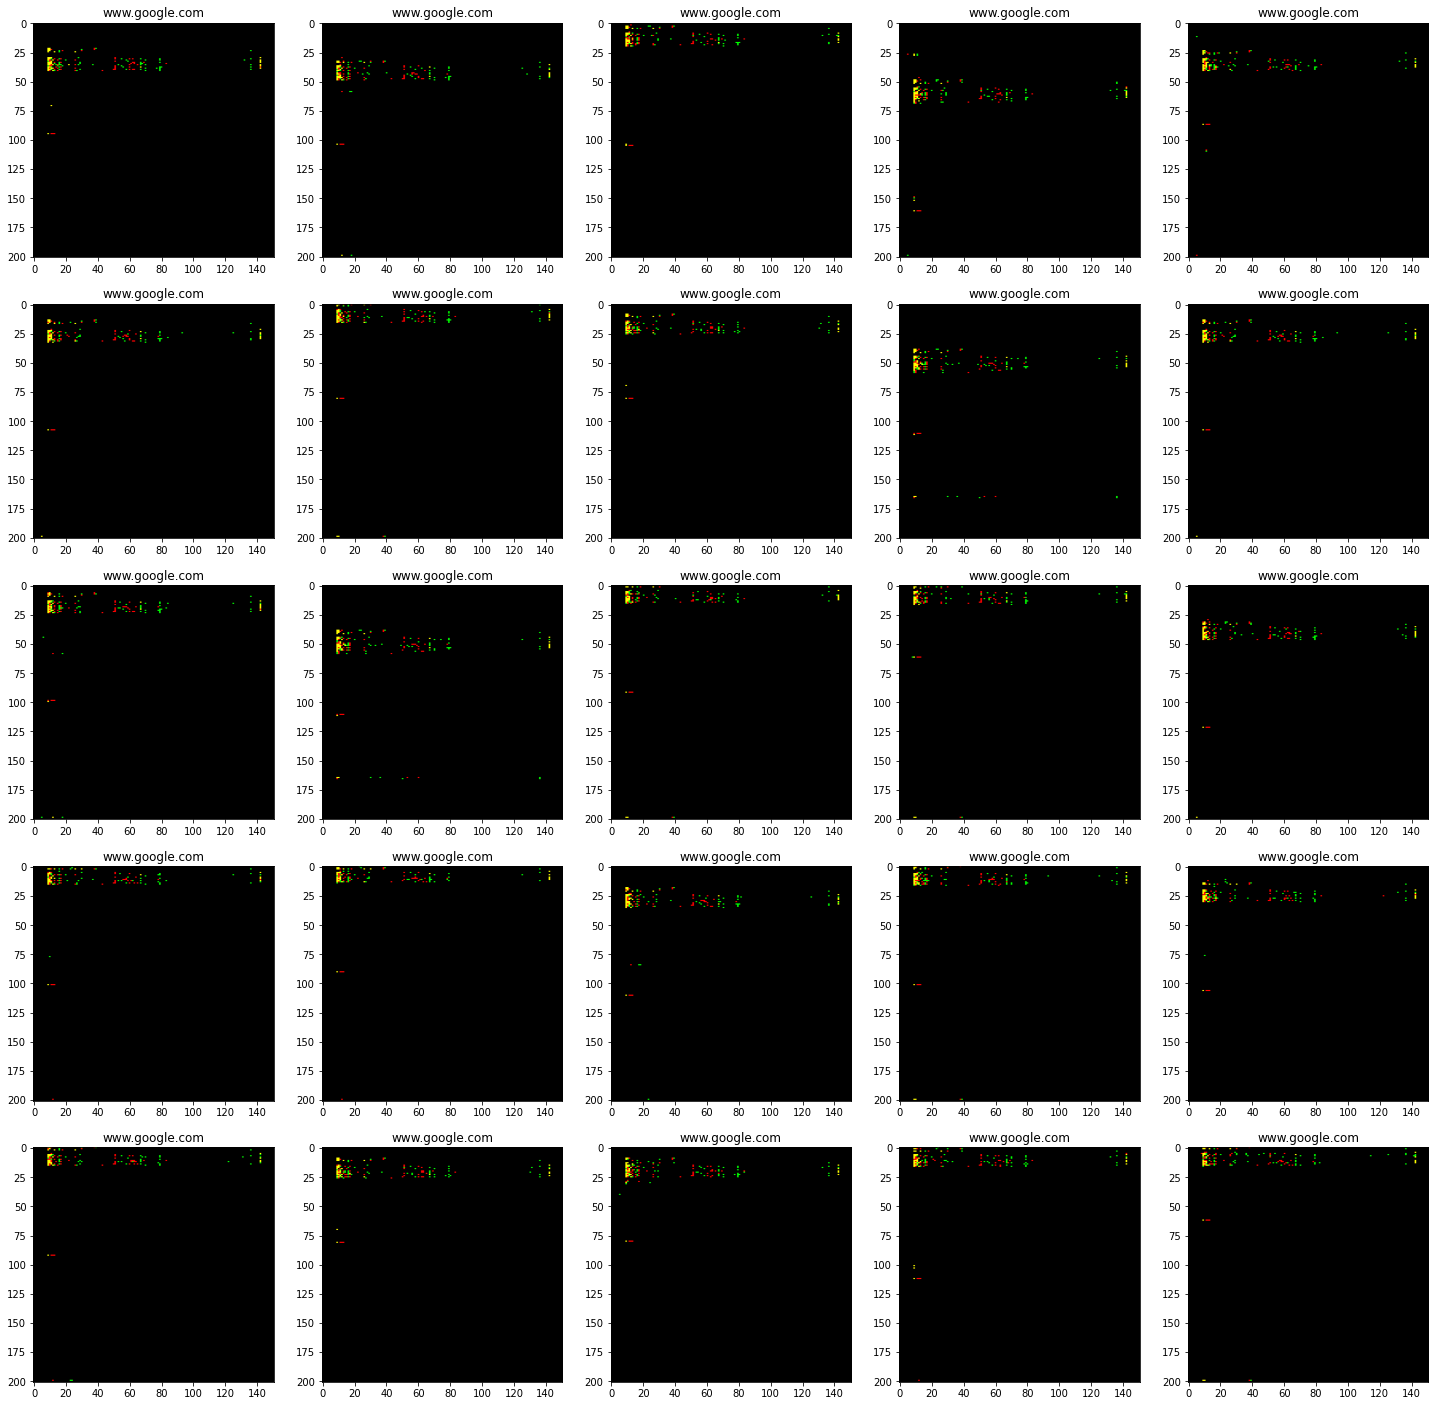

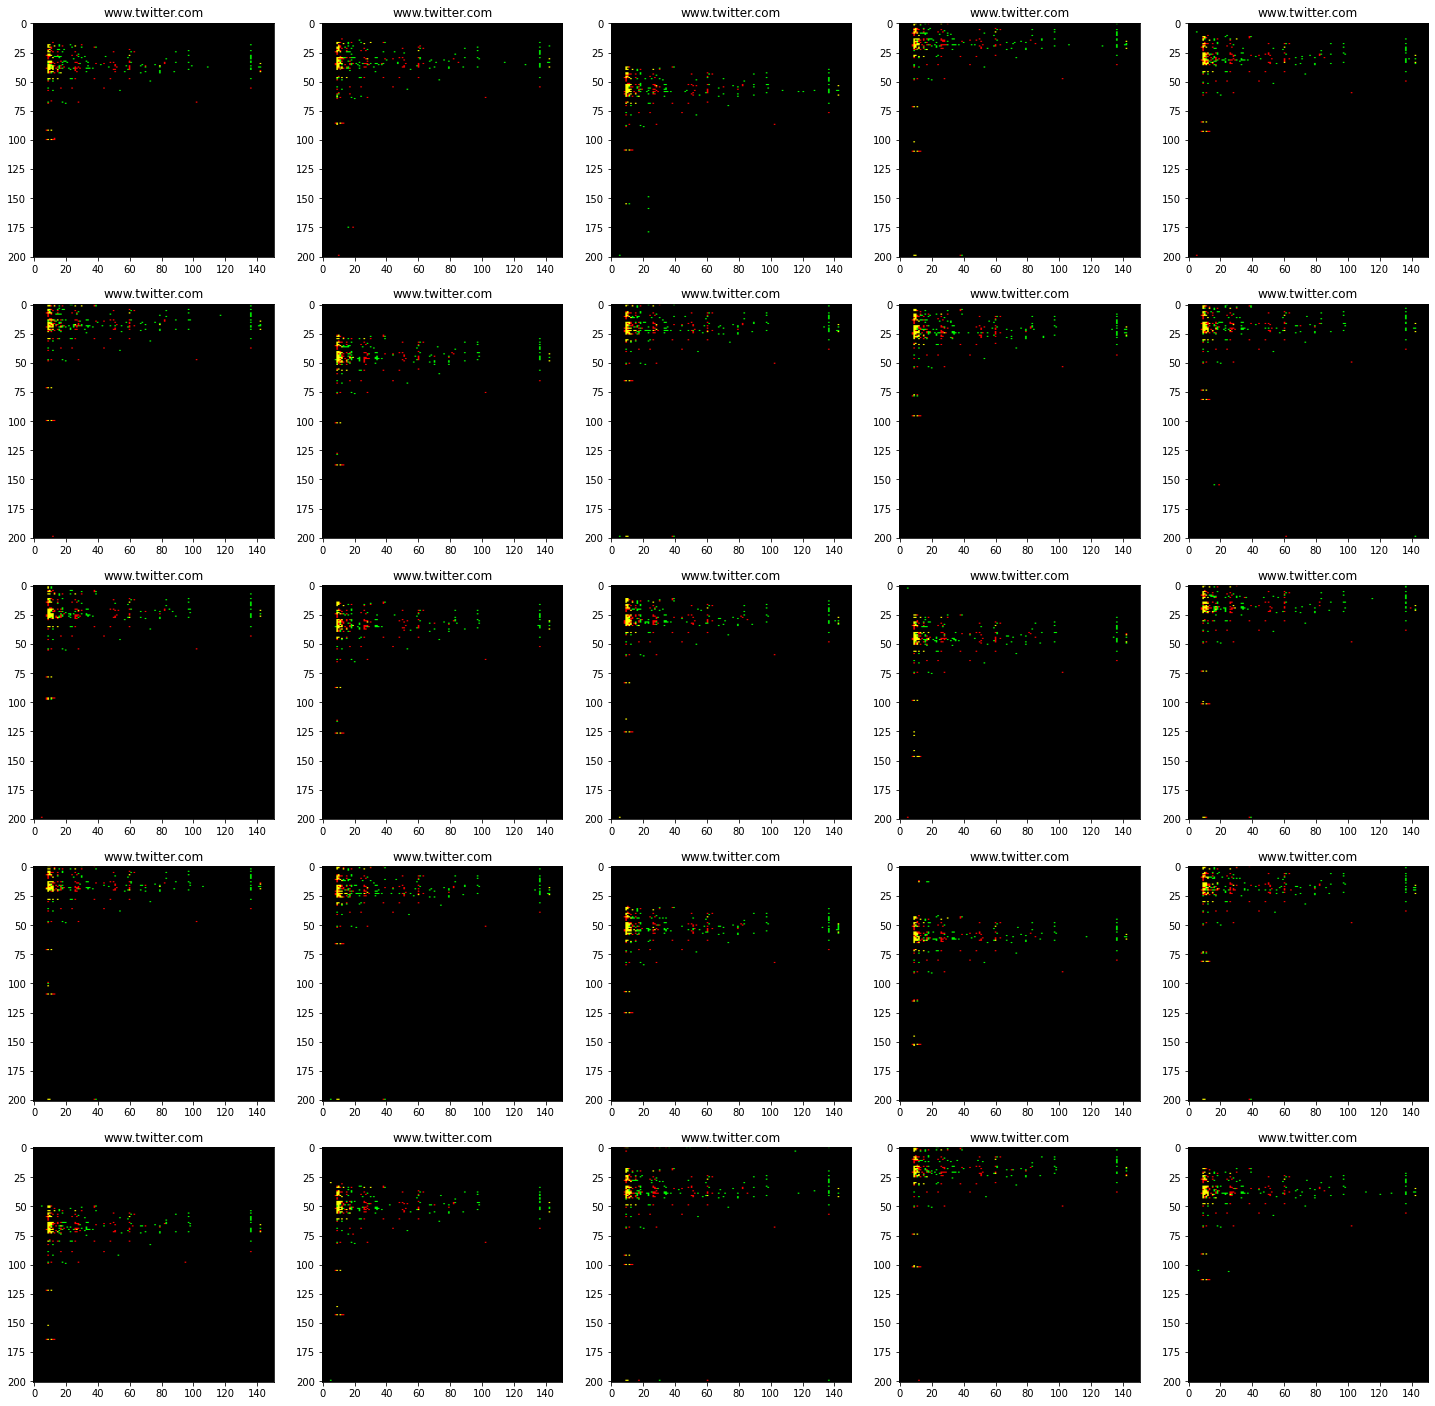

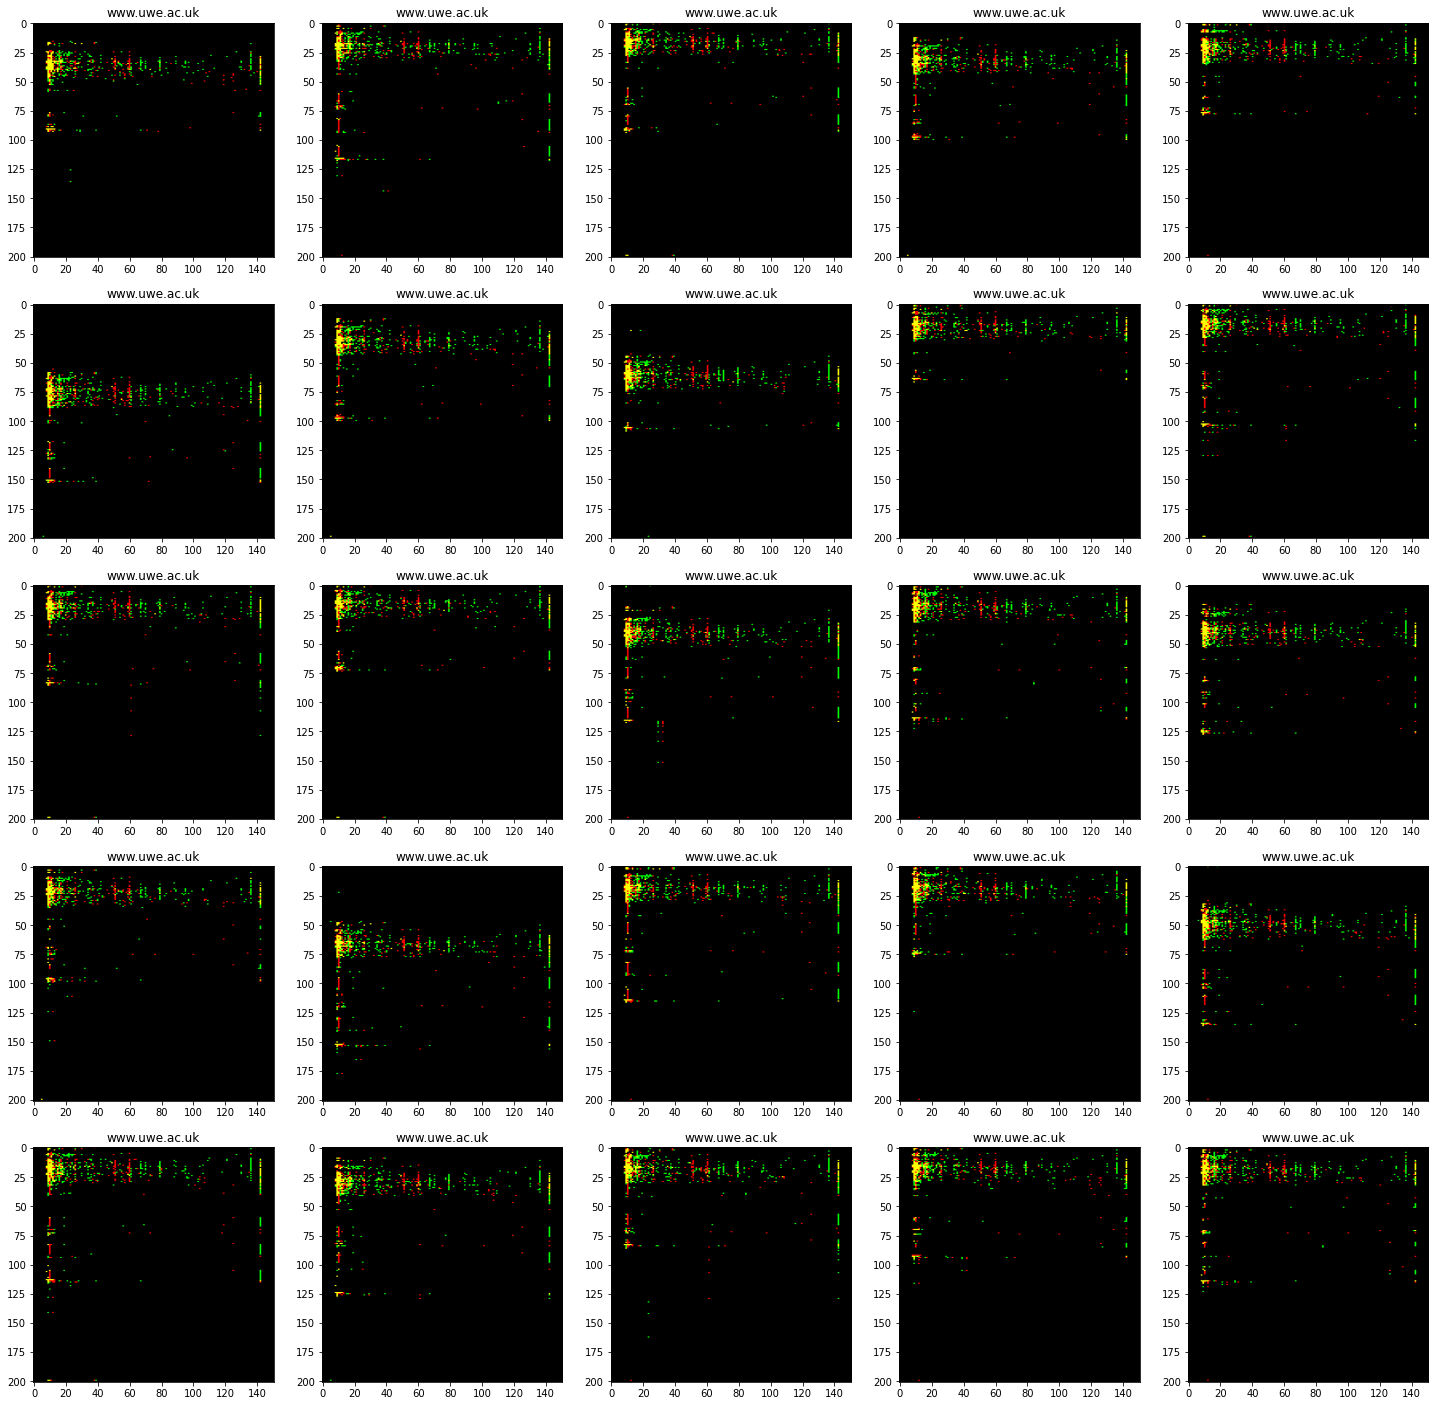

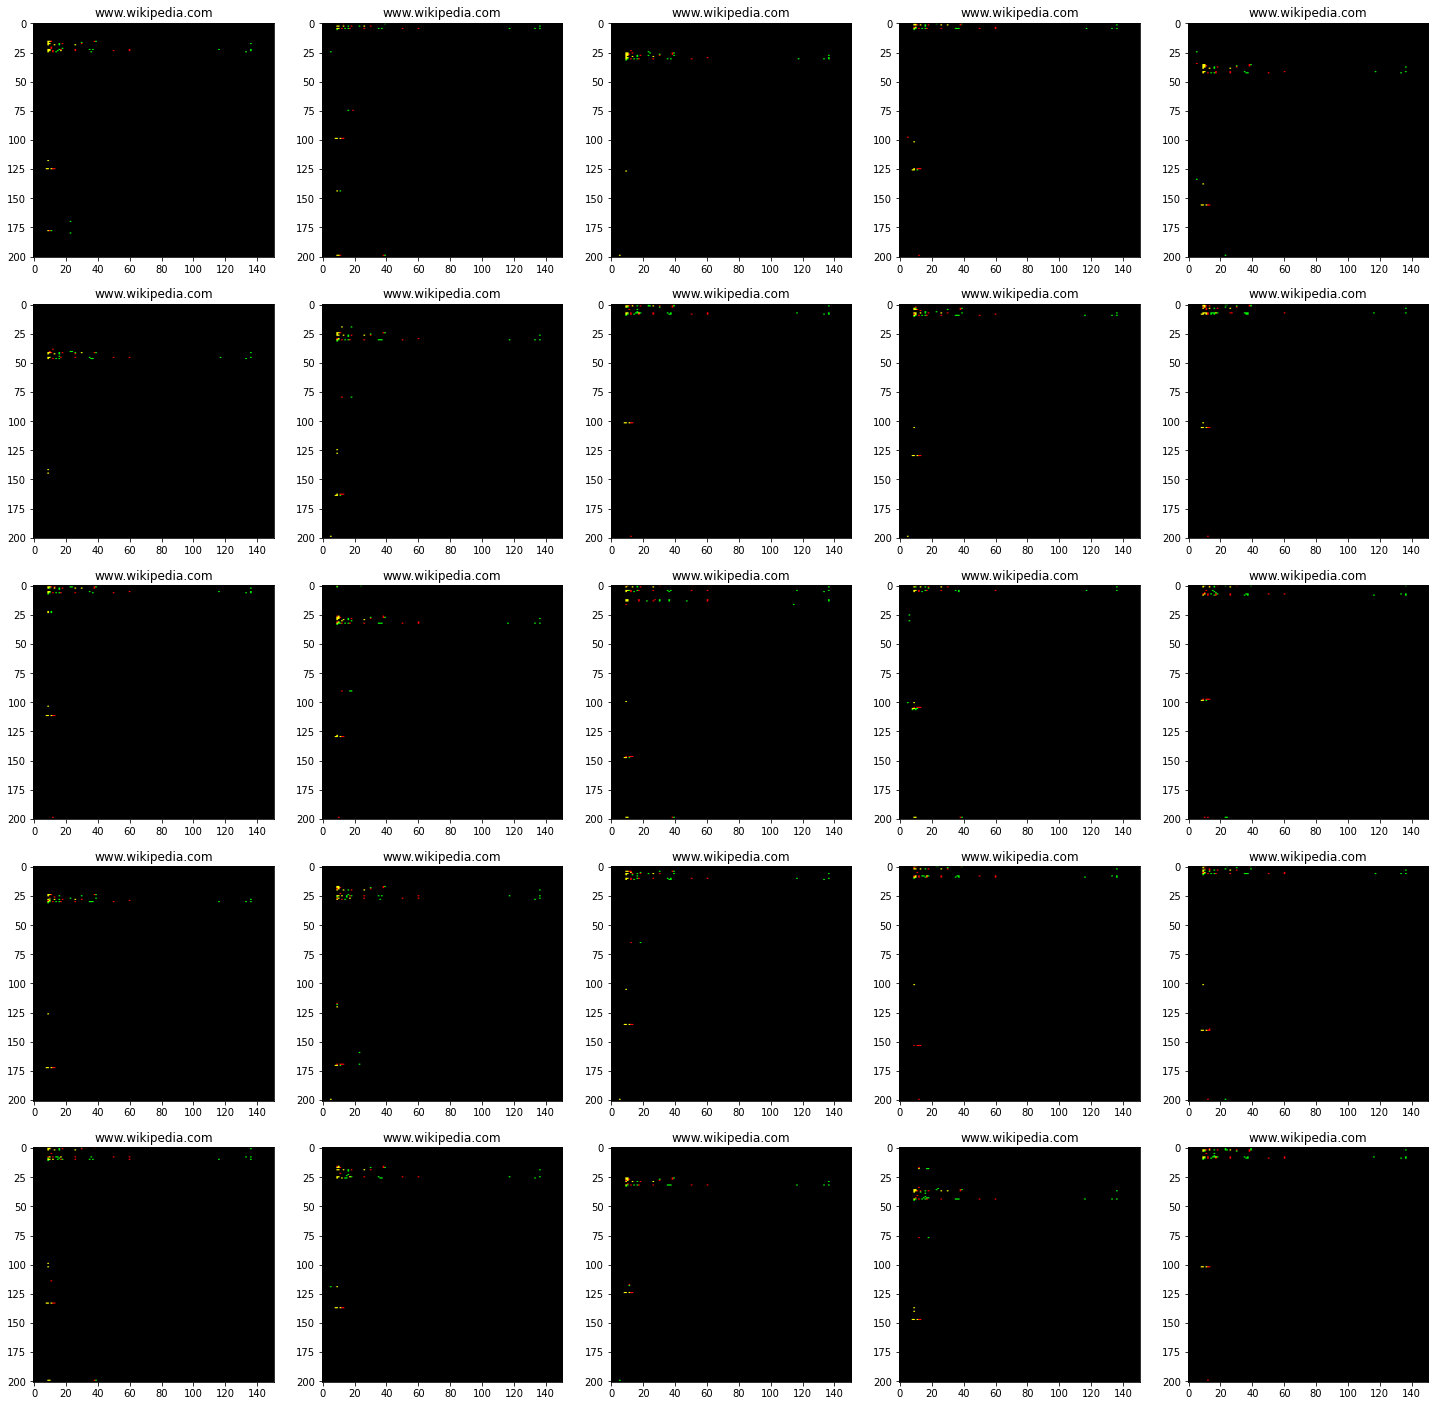

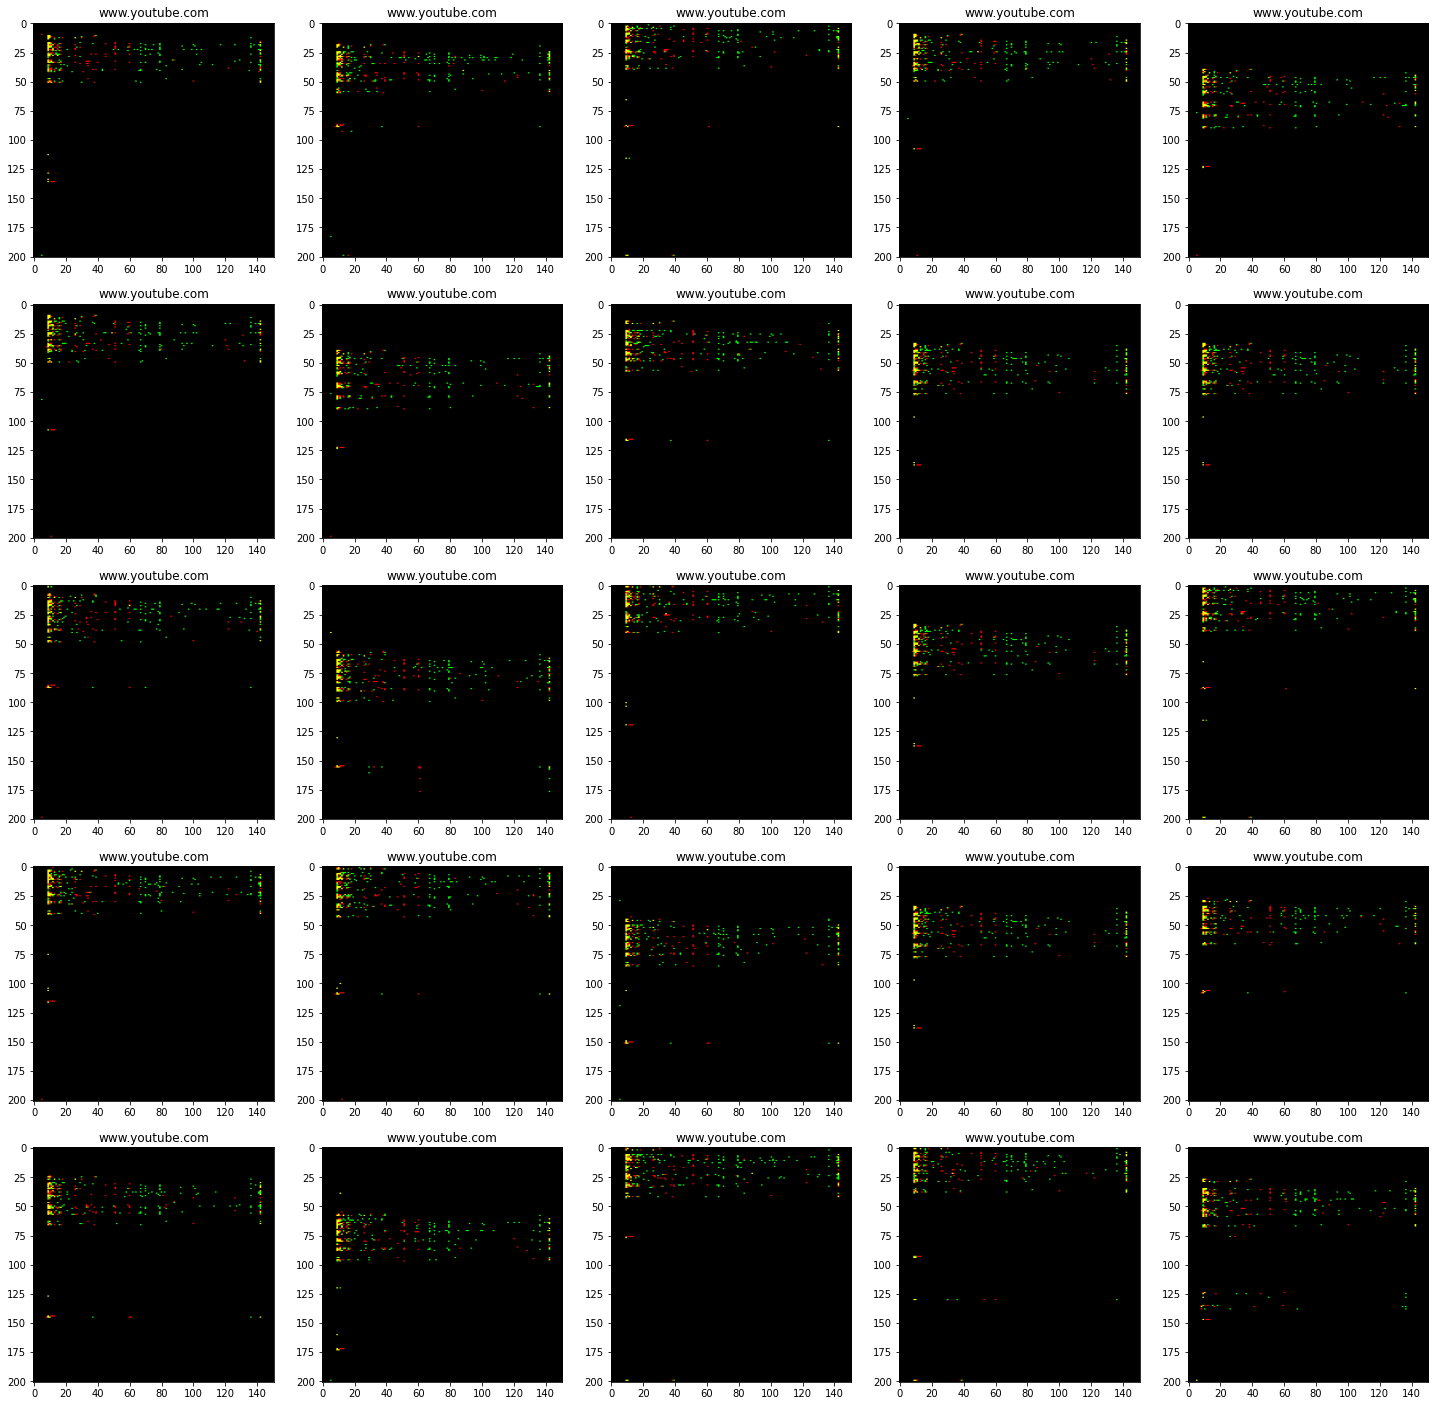

In [10]:
for label in unique_labels:

    indexes = labels_df[labels_df.label == label].index

    plt.figure(figsize=(25,25))

    
    for i in range(25):
        plt.subplot(5, 5, i +1)
        random_idx = random.randint(0, len(indexes) -1)
        plt.imshow(np.pad(features[indexes[random_idx]], (0,1)), aspect="auto")
        plt.title(f"{label}")